In [ ]:
import numpy as np
import pandas as pd
import re
pd.set_option('display.max_columns', None)

In [ ]:
# 착한 음식점 불러오기

df_착한가격업소 = pd.read_csv('./data/rank_review_goodprice.csv')
착한가격업소리스트 = list(df_착한가격업소['업소명'].values)

# 전체 음식점 불러오기

df_1_1 = pd.read_csv('./data/rank_review_1.csv',encoding="utf-8-sig")[:231]
df_1_2 = pd.read_csv('./data/rank_review_1_v2.csv',encoding="utf-8-sig")
df_2 = pd.read_csv('./data/rank_review_2.csv',encoding="utf-8-sig")
df_3 = pd.read_csv('./data/rank_review_3.csv',encoding="utf-8-sig")
df_4 = pd.read_csv('./data/rank_review_4.csv')
df_5 = pd.read_csv('./data/rank_review_5.csv')
df_6 = pd.read_csv('./data/rank_review_6.csv')
df_7 = pd.read_csv('./data/rank_review_7.csv')

df_전체 = pd.concat([df_1_1,df_1_2,df_2,df_3,df_4,df_5,df_6,df_7], axis=0, ignore_index=True)
df_전체_착한제외 = df_전체[~(df_전체.업소명.isin(착한가격업소리스트))]

print("착한업소를 제외하기 전 제주도 음식점 df의 행 개수는 ",len(df_전체),"이고, 제외 후 df의 행의 개수는 ",len(df_전체_착한제외))

df_착한가격업소.insert(loc=5,column='착한가격업소',value="o") # 착한가격업소 여부 표시
df_전체_착한제외.insert(loc=5,column='착한가격업소',value="x")

df_통합 = pd.concat([df_착한가격업소,df_전체_착한제외], axis=0, ignore_index=True) # 칼럼명 수정 등 전처리를 한번에 하기 위해 통합함


df_통합=df_통합.rename(columns={'Unnamed: 0': '인덱스'})
df_통합.insert(loc=9,column='키워드리뷰수', value = 0)
df_통합['키워드리뷰수'] = df_통합.iloc[:,10:].sum(axis=1)

# 키워드리뷰의 결측값을 0으로 변환

df_통합.iloc[:, 10:] = df_통합.iloc[:, 10:].fillna(0)

착한업소를 제외하기 전 제주도 음식점 df의 행 개수는  6792 이고, 제외 후 df의 행의 개수는  6695


In [ ]:
df_착한가격업소

,Unnamed: 0,시도,시군,업종,업소명,착한가격업소,별점,방문자 리뷰수,블로그 리뷰수,"""음식이 맛있어요""","""가성비가 좋아요""","""친절해요""","""양이 많아요""","""재료가 신선해요""","""특별한 메뉴가 있어요""","""매장이 넓어요""","""매장이 청결해요""","""혼밥하기 좋아요""","""화장실이 깨끗해요""","""인테리어가 멋져요""","""단체모임 하기 좋아요""","""주차하기 편해요""","""뷰가 좋아요""","""특별한 날 가기 좋아요""","""좌석이 편해요""","""환기가 잘 돼요""","""디저트가 맛있어요""","""커피가 맛있어요""","""음료가 맛있어요""","""대화하기 좋아요""","""사진이 잘 나와요""","""집중하기 좋아요""","""반찬이 잘 나와요""","""포장이 깔끔해요""","""현지 맛에 가까워요""","""메뉴 구성이 알차요""","""고기 질이 좋아요""","""직접 잘 구워줘요""","""깨끗해요""","""조용히 쉬기 좋아요""","""대중교통이 편해요""","""냉난방이 잘돼요""","""바비큐 해먹기 좋아요 ""","""반려동물과 가기 좋아요""","""아늑해요""","""음식이 빨리 나와요""","""차분한 분위기에요""","""술이 다양해요""","""빵이 맛있어요""","""건강한 맛이에요""","""야외 공간이 멋져요""","""컨셉이 독특해요""","""아이와 가기 좋아요""","""혼술하기 좋아요""","""잡내가 적어요""","""향신료가 강하지 않아요""","""오래 머무르기 좋아요""","""화장실이 잘 되어있어요""","""코스요리가 알차요""","""기본 안주가 좋아요"""
0,0,제주도,제주시,중식,왕서방,o,4.46,364,78,182,83,74,55,51,32,23,23,22,19,10,8,6,5,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,제주도,제주시,일식,용초밥,o,4.65,83,24,7,3,6,0,8,7,0,2,4,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,제주도,서귀포시,한식_일반,킹마트분식,o,4.25,20,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,제주도,서귀포시,기타양식,낭만팥집,o,4.47,236,124,0,25,24,0,0,38,0,13,0,1,17,0,7,0,0,0,0,52,8,6,6,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,제주도,서귀포시,한식_육류,삼겹살파티,o,4.59,52,37,17,12,11,4,10,1,6,2,0,1,2,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,제주도,제주시,한식_일반,내가찾은맛고을,o,NaN,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
176,176,제주도,제주시,한식_육류,깜돈흑돼지,o,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177,177,제주도,제주시,한식_육류,길벗식당,o,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,178,제주도,제주시,한식_일반,광양왕소금깡통구이,o,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
칼럼명리스트 = list(df_통합.columns)
칼럼명리스트

['인덱스',
 '시도',
 '시군',
 '업종',
 '업소명',
 '착한가격업소',
 '별점',
 '방문자 리뷰수',
 '블로그 리뷰수',
 '키워드리뷰수',
 '"음식이 맛있어요"',
 '"가성비가 좋아요"',
 '"친절해요"',
 '"양이 많아요"',
 '"재료가 신선해요"',
 '"특별한 메뉴가 있어요"',
 '"매장이 넓어요"',
 '"매장이 청결해요"',
 '"혼밥하기 좋아요"',
 '"화장실이 깨끗해요"',
 '"인테리어가 멋져요"',
 '"단체모임 하기 좋아요"',
 '"주차하기 편해요"',
 '"뷰가 좋아요"',
 '"특별한 날 가기 좋아요"',
 '"좌석이 편해요"',
 '"환기가 잘 돼요"',
 '"디저트가 맛있어요"',
 '"커피가 맛있어요"',
 '"음료가 맛있어요"',
 '"대화하기 좋아요"',
 '"사진이 잘 나와요"',
 '"집중하기 좋아요"',
 '"반찬이 잘 나와요"',
 '"포장이 깔끔해요"',
 '"현지 맛에 가까워요"',
 '"메뉴 구성이 알차요"',
 '"고기 질이 좋아요"',
 '"직접 잘 구워줘요"',
 '"깨끗해요"',
 '"조용히 쉬기 좋아요"',
 '"대중교통이 편해요"',
 '"냉난방이 잘돼요"',
 '"바비큐 해먹기 좋아요 "',
 '"반려동물과 가기 좋아요"',
 '"아늑해요"',
 '"음식이 빨리 나와요"',
 '"차분한 분위기에요"',
 '"술이 다양해요"',
 '"빵이 맛있어요"',
 '"건강한 맛이에요"',
 '"야외 공간이 멋져요"',
 '"컨셉이 독특해요"',
 '"아이와 가기 좋아요"',
 '"혼술하기 좋아요"',
 '"잡내가 적어요"',
 '"향신료가 강하지 않아요"',
 '"오래 머무르기 좋아요"',
 '"화장실이 잘 되어있어요"',
 '"코스요리가 알차요"',
 '"기본 안주가 좋아요"',
 '"비싼 만큼 가치있어요"',
 '"음악이 좋아요"',
 '"볼거리가 많아요"',
 '"가격이 합리적이에요"',
 '"체험 프로그램이 다양해요"',
 '"놀이기구가 다양해요"',
 '"먹거리가 풍부해요

In [ ]:
# 음식점무관한리뷰 있는 행 제거

칼럼명리스트 = list(df_통합.columns)
음식점무관한리뷰_칼럼명리스트 = [
 '"볼거리가 많아요"',
 '"체험 프로그램이 다양해요"',
 '"놀이기구가 다양해요"',
 '"특색 있는 제품이 많아요"',
 '"품질이 좋아요"',
 '"침구가 좋아요"',
 '"호캉스하기 좋아요"',
 '"수영장이 잘 되어있어요"',
 '"방음이 잘돼요"',
 '"조식이 맛있어요"',
 '"즐길 거리가 많아요"',
 '"수업이 체계적이에요"',
 '"안전하게 관리해요"',
 '"샤워실이 잘 되어있어요"',
 '"최신 장비를 사용해요"',
 '"물이 깨끗해요"',
 '"픽업서비스가 편해요"',
 '"룸이 잘 되어있어요"',
 '"휴게공간이 잘 되어있어요"',
 '"취식 공간이 잘 되어있어요"',
 '"상품이 다양해요"',
 '"즉석커피가 맛있어요"',
 '"할인/적립을 잘 챙겨줘요"',
 '"행사 상품이 다양해요"',
 '"즉석조리 식품이 맛있어요"',
 '"배달 시스템이 편리해요"',
 '"트렌디한 상품이 많아요"',
 '"책 종류가 다양해요"',
 '"책 읽기 쾌적해요"',
 '"원하는 책을 찾기 쉬워요"',
 '"베스트셀러가 많아요"',
 '"신간이 빨리 들어와요"',
 '"카페 같은 분위기에요"',
 '"독특한 책이 많아요"',
 '"차량 상태가 좋아요"',
 '"픽업과 반납이 편리해요"',
 '"차종이 다양해요"',
 '"보험 비교가 쉬워요"',
 '"꼼꼼하게 점검해줘요"',
 '"작업이 신속해요"',
 '"대기공간이 잘 되어있어요"',
 '"설명이 자세해요"',
 '"견적 비교를 잘해줘요"',
 '"차량용품이 다양해요"',
 '"대기시간이 짧아요"',
 '"마사지가 시원해요"',
 '"맞춤 케어를 잘해줘요"',
 '"시술이 꼼꼼해요"',
 '"예약이 편리해요"',
 '"상담이 자세해요"',
 '"근처에 갈 곳이 많아요"',
 '"물놀이하기 좋아요"',
 '"자연스럽게 연출해줘요"',
 '"보정을 꼼꼼하게 해줘요"',
 '"파우더룸이 잘 되어있어요"',
 '"세트장 구성이 다양해요"',
 '"소품이 다양해요"',
 '"규모가 커요"',
 '"필드 상태가 좋아요"',
 '"캐디의 진행이 매끄러워요"',
 '"클럽하우스가 잘 되어있어요"',
 '"코스가 변별력 있어요"',
 '"거리 측정을 잘해줘요"',
 '"예약 시간을 잘 지켜요"',
 '"그늘집이 잘 되어있어요"',
 '"산책로가 잘 되어있어요"',
 '"신기한 식물이 많아요"',
 '"편의시설이 잘 되어있어요"',
 '"조리하기 쉬워요"',
 '"부모도 쉬기 좋아요"',
 '"놀거리가 많아요"',
 '"추천을 잘해줘요"',
 '"포장이 정성스러워요"',
 '"관리가 잘 되어있어요"',
 '"신상품이 많아요"',
 '"파티하기 좋아요"',
 '"수심이 다양해요"',
 '"학생과 소통을 잘해요"',
 '"대여장비 상태가 좋아요"',
 '"선물하기 좋아요"',
 '"취사시설이 잘 되어있어요"',
 '"사진 컨셉이 다양해요"',
 '"예쁜 아기 의상이 많아요"',
 '"다양하게 연출하기 좋아요"',
 '"룸서비스가 잘 되어있어요"',
 '"아기자기해요"',
 '"자연 경관이 좋아요"',
 '"유익해요"',
 '"전기 사용이 편해요"',
 '"온수가 잘 나와요"',
 '"말 교육이 잘 되어있어요"',
 '"강습 받기 좋아요"',
 '"코스가 길어요"',
 '"코스가 다양해요"',
 '"선생님이 열정적이에요"',
 '"맞춤 지도를 잘해줘요"',
 '"조리법 설명이 자세해요"',
 '"라이브공연이 훌륭해요"',
 '"부위가 다양해요"',
 '"수면실이 잘 되어있어요"',
 '"특이한 찜질방이 있어요"',
 '"부대시설이 잘 되어있어요"',
 '"트렌디해요"',
 '"택배 이용이 편리해요"',
 'Unnamed: 64',
'"집중하기 좋아요"',
 '"전시 구성이 알차요"',
 '"전시 테마가 재밌어요"',
 '"설명이 잘 되어있어요"',
 '"피크닉하기 좋아요"',
 '"관리 효과가 좋아요"',
 '"야경이 멋져요"',
 '"동물을 배려한 환경이에요"',
 '"프로그램 구성이 알차요"',
 '"바비큐 해먹기 좋아요 "']

print( "음식점 무관한 리뷰가 있는 행 제거 전의 데이터 개수는 : ",len(df_통합), "칼럼의 개수는 : ",df_통합.shape[1])

for 칼럼명 in 음식점무관한리뷰_칼럼명리스트:
    df_통합 = df_통합[(df_통합[칼럼명]==0) | (df_통합[칼럼명].isna())]

print( "음식점 무관한 리뷰가 있는 행 제거 이후의 데이터 개수는 : ",len(df_통합))

df_통합 = df_통합.loc[:, (df_통합 != 0).any()]

print( "값이 0만 있는 칼럼을 제거한 후의 칼럼 개수는 : ",df_통합.shape[1])

음식점 무관한 리뷰가 있는 행 제거 전의 데이터 개수는 :  6875 칼럼의 개수는 :  194
음식점 무관한 리뷰가 있는 행 제거 이후의 데이터 개수는 :  6626
값이 0만 있는 칼럼을 제거한 후의 칼럼 개수는 :  69


In [ ]:
칼럼명리스트_new = list(df_통합.columns)
키워드리스트 = 칼럼명리스트_new[10:]

In [ ]:
# 한줄평 비율 칼럼들 추가하기
칼럼명리스트_new = list(df_통합.columns)
키워드리스트 = 칼럼명리스트_new[10:]

키워드그룹 = pd.read_excel('./data/키워드리뷰그룹.xlsx')
키워드그룹
# 한줄평리스트

for group in 키워드그룹['구분'].unique():
    columns = list(키워드그룹.loc[키워드그룹['구분'] == group, '칼럼명'])
    df_group = df_통합[columns].sum(axis=1)
    df_통합[group] = df_group


# 비율 칼럼 이름과 계산식 정의
ratios = list(키워드그룹['구분'].unique())  # 비율 칼럼 이름
dividend = '키워드리뷰수'  # 나눠지는 값의 칼럼 이름

# 비율 칼럼 추가
for ratio in ratios:
    column_name = f'{ratio} 리뷰 비율'
    df_통합[column_name] = df_통합[ratio] / df_통합[dividend]

In [ ]:
df_통합.columns

Index(['인덱스', '시도', '시군', '업종', '업소명', '착한가격업소', '별점', '방문자 리뷰수', '블로그 리뷰수',
       '키워드리뷰수', '"음식이 맛있어요"', '"가성비가 좋아요"', '"친절해요"', '"양이 많아요"',
       '"재료가 신선해요"', '"특별한 메뉴가 있어요"', '"매장이 넓어요"', '"매장이 청결해요"', '"혼밥하기 좋아요"',
       '"화장실이 깨끗해요"', '"인테리어가 멋져요"', '"단체모임 하기 좋아요"', '"주차하기 편해요"', '"뷰가 좋아요"',
       '"특별한 날 가기 좋아요"', '"좌석이 편해요"', '"환기가 잘 돼요"', '"디저트가 맛있어요"',
       '"커피가 맛있어요"', '"음료가 맛있어요"', '"대화하기 좋아요"', '"사진이 잘 나와요"', '"반찬이 잘 나와요"',
       '"포장이 깔끔해요"', '"현지 맛에 가까워요"', '"메뉴 구성이 알차요"', '"고기 질이 좋아요"',
       '"직접 잘 구워줘요"', '"깨끗해요"', '"조용히 쉬기 좋아요"', '"대중교통이 편해요"',
       '"반려동물과 가기 좋아요"', '"아늑해요"', '"음식이 빨리 나와요"', '"차분한 분위기에요"', '"술이 다양해요"',
       '"빵이 맛있어요"', '"건강한 맛이에요"', '"야외 공간이 멋져요"', '"컨셉이 독특해요"', '"아이와 가기 좋아요"',
       '"혼술하기 좋아요"', '"잡내가 적어요"', '"향신료가 강하지 않아요"', '"오래 머무르기 좋아요"',
       '"화장실이 잘 되어있어요"', '"코스요리가 알차요"', '"기본 안주가 좋아요"', '"비싼 만큼 가치있어요"',
       '"음악이 좋아요"', '"가격이 합리적이에요"', '"종류가 다양해요"', '"차가 맛있어요"', '"위생적이에요"',
       '"샐러드바가 잘 되어있어요"', '"신선해요"', '"맛있어요"'

In [ ]:
df_통합.head(3)

,인덱스,시도,시군,업종,업소명,착한가격업소,별점,방문자 리뷰수,블로그 리뷰수,키워드리뷰수,"""음식이 맛있어요""","""가성비가 좋아요""","""친절해요""","""양이 많아요""","""재료가 신선해요""","""특별한 메뉴가 있어요""","""매장이 넓어요""","""매장이 청결해요""","""혼밥하기 좋아요""","""화장실이 깨끗해요""","""인테리어가 멋져요""","""단체모임 하기 좋아요""","""주차하기 편해요""","""뷰가 좋아요""","""특별한 날 가기 좋아요""","""좌석이 편해요""","""환기가 잘 돼요""","""디저트가 맛있어요""","""커피가 맛있어요""","""음료가 맛있어요""","""대화하기 좋아요""","""사진이 잘 나와요""","""반찬이 잘 나와요""","""포장이 깔끔해요""","""현지 맛에 가까워요""","""메뉴 구성이 알차요""","""고기 질이 좋아요""","""직접 잘 구워줘요""","""깨끗해요""","""조용히 쉬기 좋아요""","""대중교통이 편해요""","""반려동물과 가기 좋아요""","""아늑해요""","""음식이 빨리 나와요""","""차분한 분위기에요""","""술이 다양해요""","""빵이 맛있어요""","""건강한 맛이에요""","""야외 공간이 멋져요""","""컨셉이 독특해요""","""아이와 가기 좋아요""","""혼술하기 좋아요""","""잡내가 적어요""","""향신료가 강하지 않아요""","""오래 머무르기 좋아요""","""화장실이 잘 되어있어요""","""코스요리가 알차요""","""기본 안주가 좋아요""","""비싼 만큼 가치있어요""","""음악이 좋아요""","""가격이 합리적이에요""","""종류가 다양해요""","""차가 맛있어요""","""위생적이에요""","""샐러드바가 잘 되어있어요""","""신선해요""","""맛있어요""","""손질이 깔끔해요""","""원산지 표시가 명확해요""",맛,가격,서비스,위생,기타,맛 리뷰 비율,가격 리뷰 비율,서비스 리뷰 비율,위생 리뷰 비율,기타 리뷰 비율
0,0,제주도,제주시,중식,왕서방,o,4.46,364,78,598.0,182,83,74,55,51,32,23,23,22,19,10,8,6,5,3,1,1.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0,138.0,74,94.0,78.0,0.357860,0.230769,0.123746,0.157191,0.130435
1,1,제주도,제주시,일식,용초밥,o,4.65,83,24,41.0,7,3,6,0,8,7,0,2,4,0,2,0,1,0,1,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,3.0,6,10.0,8.0,0.341463,0.073171,0.146341,0.243902,0.195122
2,2,제주도,서귀포시,한식_일반,킹마트분식,o,4.25,20,NaN,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 필요없는 행 제거 코드

# 별점, 리뷰수 없는 행 제거
결측제거칼럼 = ['별점','방문자 리뷰수','키워드리뷰수']
df_통합_clean = df_통합.dropna(subset=결측제거칼럼)
df_통합_clean = df_통합_clean[df_통합_clean['키워드리뷰수']!=0]

# nan값만 있는 칼럼 제거
df_통합_clean = df_통합_clean.dropna(axis='columns', how='all')

# 업종이 한식이 아닌 경우 제거
print(df_통합.업종.unique())
df_통합_clean = df_통합_clean[df_통합_clean.업종.isin(['한식_일반','한식_육류', '한식_찌개류', '한식_분식', '한식_해산물','한식_면류', '한식'])]

print(len(df_통합),len(df_통합_clean))
print(df_통합.shape[1],df_통합_clean.shape[1])


['중식' '일식' '한식_일반' '한식_육류' '한식_찌개류' '기타양식' '한식_분식' '한식_해산물' '한식_면류' '양식'
 '한식']
6626 3063
79 79


In [ ]:
df_통합_clean[df_통합_clean['착한가격업소']=="o"][['별점','방문자 리뷰수','블로그 리뷰수','키워드리뷰수', '맛 리뷰 비율', '가격 리뷰 비율', '서비스 리뷰 비율','위생 리뷰 비율', '기타 리뷰 비율']].describe()

,별점,키워드리뷰수,맛 리뷰 비율,가격 리뷰 비율,서비스 리뷰 비율,위생 리뷰 비율,기타 리뷰 비율
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,4.399907,401.121495,0.344574,0.232679,0.136940,0.136049,0.149758
std,0.275470,638.167168,0.071557,0.077861,0.042759,0.052131,0.068641
min,3.210000,19.000000,0.184211,0.059190,0.040000,0.000000,0.000000
25%,4.270000,71.000000,0.302233,0.182383,0.108690,0.097614,0.104356
50%,4.450000,166.000000,0.332846,0.242424,0.133333,0.136364,0.140351
75%,4.590000,392.500000,0.387726,0.295072,0.163877,0.174894,0.195319
max,4.890000,3435.000000,0.600000,0.375226,0.260870,0.285171,0.354839


In [ ]:
df_통합_clean[df_통합_clean['착한가격업소']=="x"][['별점','방문자 리뷰수','블로그 리뷰수','키워드리뷰수', '맛 리뷰 비율', '가격 리뷰 비율', '서비스 리뷰 비율','위생 리뷰 비율', '기타 리뷰 비율']].describe()

,별점,키워드리뷰수,맛 리뷰 비율,가격 리뷰 비율,서비스 리뷰 비율,위생 리뷰 비율,기타 리뷰 비율
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000
mean,4.431505,643.004736,0.356961,0.170133,0.141282,0.156882,0.174742
std,0.257953,2160.236473,0.076063,0.077950,0.044303,0.062585,0.085958
min,3.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.290000,76.750000,0.304959,0.114624,0.111111,0.113031,0.112773
50%,4.430000,176.000000,0.347826,0.164281,0.138379,0.155738,0.161891
75%,4.590000,499.000000,0.401284,0.220872,0.166667,0.197592,0.228017
max,5.000000,56442.000000,0.771429,0.480000,0.437500,0.447619,0.645995


<AxesSubplot:>

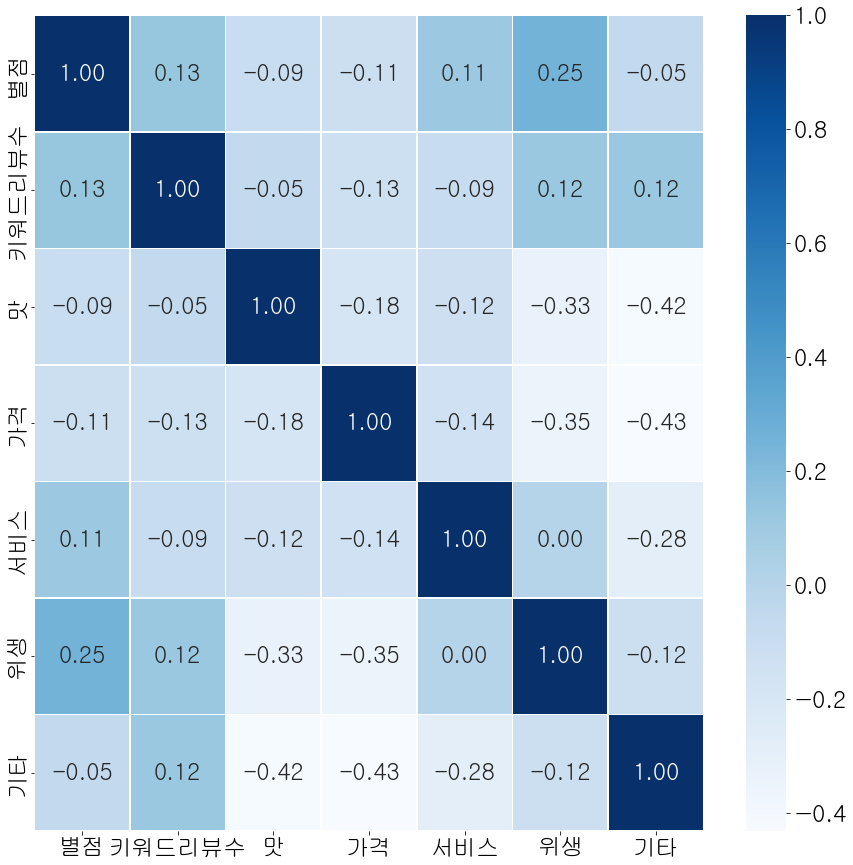

In [ ]:
summary = df_통합_clean[['별점','방문자 리뷰수','블로그 리뷰수','키워드리뷰수', '맛 리뷰 비율', '가격 리뷰 비율', '서비스 리뷰 비율','위생 리뷰 비율', '기타 리뷰 비율']]
summary = summary.rename(columns={'맛 리뷰 비율':'맛', '가격 리뷰 비율':'가격', '서비스 리뷰 비율':'서비스','위생 리뷰 비율':'위생', '기타 리뷰 비율':'기타'})

#%matplotlib inline   #쥬피터노트북에서 이미지 표시가능하게 하는 쥬피터노트북 매직함수
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font, size=23)

plt.figure(figsize=(15,15))
sns.heatmap(data = summary.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')